# Convolutional Neural Networks (CNN)

## Konu Başlıkları
* [Python Kütüphaneleri](#1)
* [Veri Seti](#2)
* [Normalization - Reshape - Label Encoding](#3)
* [Train Test Split](#4)
* [Create Model](#5)
* [Define Optimizer](#6)
* [Compile Model](#7)
* [Epochs and Batch Size](#8)
* [Data Augmentation](#9)
* [Fit the Model](#10)
* [Evaluate the Model](#11)

<a id="1" ></a>
## Python Kütüphaneleri

In [1]:
import numpy as np
import pandas as pd

# görselleştirme
import seaborn as sns
import matplotlib.pyplot as plt

# uyarıları kapatma
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.utils import to_categorical # one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

<a id="2" ></a>
## Veri Seti

In [2]:
# Eğitim veri seti

In [3]:
train = pd.read_csv("digit-recognizer/train.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# 42000 tane image
# 784 tane pixel var 28x28
# 1 tane label var, label image'imin hangi resim olduğunu gösteren sınıf
train.shape

(42000, 785)

* bir resmin sayısal karşılığı pikseller ile ifade edilir.
* makina resmi renklerinden anlar. renkler pikseller ile ifade edilir.
* bu veri setinde 28x28'den 784 tane piksel vardır.
* label resimde hangi sayının olduğunu belirtir. piksellerde sayının resmini oluşturur.
* label'ın sınıf 1'i resimde 1 sayısı olduğu anlamına gelir. 784 pikselin birleşimiyle 1 sayısı elde edilir.
* 784 tane piksel 28x28'lik bir matrix oluşturarak 4 sayısını oluşturur.

In [5]:
# Test veri seti

In [6]:
test = pd.read_csv("digit-recognizer/test.csv")
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# 28000 tane image
# 784 tane pixel var 28x28
test.shape

(28000, 784)

In [8]:
# bu verilerle CNN modeli eğitilecek
y_train = train["label"] # bağımlı değişken
x_train = train.drop(labels = ["label"], axis=1) # bağımsız değişkenler

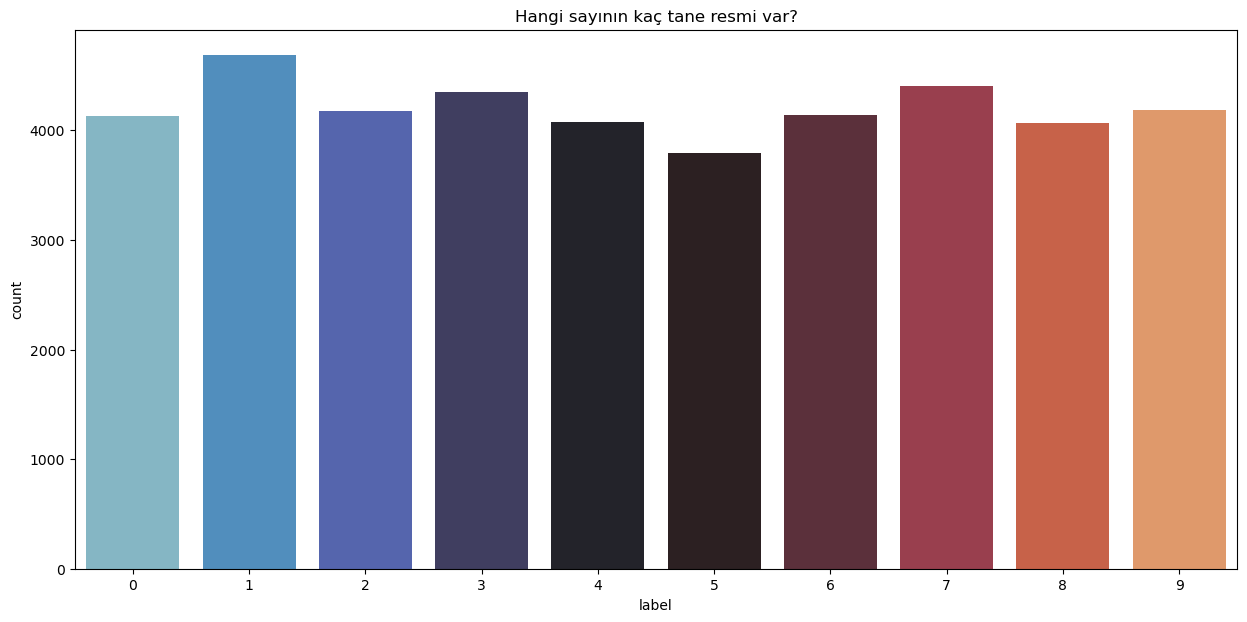

In [9]:
# dağılımı inceleyelim, hangi sayının kaç tane resmi var?
plt.figure(figsize = (15, 7))
sns.countplot(x=y_train, palette="icefire") # hangi sayıdan kaç tane var?
plt.title("Hangi sayının kaç tane resmi var?")
plt.show()

In [10]:
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

4132 tane sıfır içeren resim varmış.

In [11]:
# veri setinin 0. satırındaki pikseller 1 sayısını oluşturuyordu
# bu bir sayısını görselleştirelim

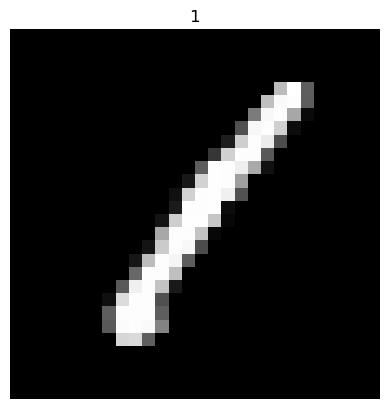

In [12]:
img = x_train.iloc[0].to_numpy() # matrix'e dönüştür
img = img.reshape((28, 28)) # matrix'i yeniden boyutlandır

# görselleştirme
plt.imshow(img, cmap="gray")
plt.title(train.iloc[0,0]) # train veri setinin 0.satır, 0. sütun(label) -> 1
plt.axis("off") # eksenleri gözükmesin
plt.show()

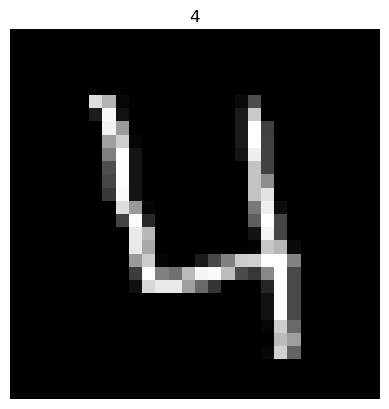

In [13]:
# 3. indeksteki satırı görselleştirelim
img = x_train.iloc[3].to_numpy() # matrix'e dönüştür
img = img.reshape((28,28)) # matrix'i yeniden boyutlandır

plt.imshow(img, cmap="gray")
plt.title(train.iloc[3,0]) # train veri setinin 3.satır, 1. sütun(label) -> 4
plt.axis("off") # eksenleri gözükmesin
plt.show()

<a id="3" ></a>
## Normalization - Reshape - Label Encoding

* Normalizasyon
    * Normalizasyon işlemi, resmin her bir pikselini 0 ile 1 arasında bir değere dönüştürmeyi içerir. Bu, her pikselin renk bileşenlerinin (genellikle 0 ile 255 arasında olan) uygun bir dönüşümle [0, 1] aralığına ölçeklendirilmesini ifade eder. Bu işlem, resimlerin işlenmesi ve analizi için kullanılır ve piksel değerlerini [0, 1] aralığına taşırken, renk bilgisini korur.
    * Normalizasyon CNN'in çalışmasını hızlandırır.
* Reshape
    * 28x28'lik resimleri 28x28x1 şeklinde 3D matrix yapmak zorundayız çünkü keras bu formatta çalışıyor. 28x28 piksel boyutundaki bir gri tonlu görüntüyü temsil etmek için genellikle 28x28x1 şeklinde bir 3D matris kullanılır. Bu matrisin son boyutu, kanal sayısını temsil eder ve gri tonlu görüntülerde yalnızca bir kanal vardır. Eğer renkli bir görüntü ile çalışıyorsanız, o zaman renk kanallarını temsil etmek için 28x28x3 bir 3D matris kullanmanız gerekir (örneğin, RGB renk uzayı için). Keras ve diğer derin öğrenme çerçeveleri, girdi verilerinin bu tür 3D matrislerle uyumlu olarak beklerler.
* Label Encoding
    * 0'dan 9'a kadar toplam 10 farklı rakam vardır. dolayısıyla 10 farklı sınıf vardır.

<!DOCTYPE html>
<html>
<head>
    <title>Label Encoding</title>
</head>
<body>
    <table>
        <tr>
            <th>Label</th>
            <th>0</th>
            <th>1</th>
            <th>2</th>
            <th>3</th>
            <th>4</th>
            <th>5</th>
            <th>6</th>
            <th>7</th>
            <th>8</th>
            <th>9</th>
        </tr>
        <tr>
            <th>0</th>
            <td>1</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
        </tr>
        <tr>
            <th>1</th>
            <td>0</td>
            <td>1</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
        </tr>
        <tr>
            <th>2</th>
            <td>0</td>
            <td>0</td>
            <td>1</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
        </tr>
        <tr>
            <th>3</th>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>1</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
        </tr>
        <tr>
            <th>4</th>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>1</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
        </tr>
        <tr>
            <th>5</th>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>1</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
        </tr>
        <tr>
            <th>6</th>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>1</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
        </tr>
        <tr>
            <th>7</th>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>1</td>
            <td>0</td>
            <td>0</td>
        </tr>
        <tr>
            <th>8</th>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>1</td>
            <td>0</td>
        </tr>
        <tr>
            <th>9</th>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>1</td>
        </tr>
    </table>
</body>
</html>

In [14]:
# Normalizasyon işlemi
x_train = x_train / 255.0 # bağımsız değişkenler
test = test / 255.0 # bağımsız değişkenler

In [15]:
print("x_train shape:", x_train.shape)
print("test shape:", test.shape)

x_train shape: (42000, 784)
test shape: (28000, 784)


In [16]:
# Reshape
x_train = x_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

Bu kod, genellikle Keras veya benzeri derin öğrenme çerçevelerinde kullanılan veri hazırlama işlemi için kullanılır. Kod, verileri yeniden şekillendirir (reshape) ve genellikle görüntü verilerini uygun bir 4D tensör formatına getirmek için kullanılır.

Aşağıda her iki satırın ne yaptığını açıklayan ayrıntılı bir açıklama bulunmaktadır:

1. `x_train` ve `test` veri setlerinin `.values` özelliği kullanılarak DataFrame veya başka bir veri yapısından NumPy dizilerine dönüştürülür. Bu, verilerin daha sonra NumPy dizileri üzerinde işlem yapmak için kullanılabilir hale gelmesini sağlar.

2. `.reshape(-1, 28, 28, 1)` kodu, her iki veri setini 4D tensör formatına dönüştürür. Burada:
   - `-1`: Bu, otomatik olarak boyutu belirlemesi için bir yer tutucudur. Yani, bu boyuta otomatik olarak uygun boyut atanır.
   - `28, 28`: Görüntülerin genişliği ve yüksekliği, bu örneklerde 28 pikseldir.
   - `1`: Bu, kanal sayısını temsil eder. Genellikle gri tonlu görüntüler için 1 olarak ayarlanır çünkü bunlar sadece tek bir renk kanalına sahiptir. Renkli görüntüler için ise genellikle 3 olarak ayarlanır çünkü bunlar üç renk kanalına (RGB) sahiptir.

Sonuç olarak, her iki veri seti artık 4D tensörlerdir ve bu format, derin öğrenme modellerine girdi olarak veri sağlamak için kullanılır. Bu kod aynı zamanda veriyi uygun bir şekilde yeniden şekillendirirken renk bilgisini korur, çünkü gri tonlu görüntülerde sadece bir kanal kullanılır ve renkli görüntülerde üç kanal kullanılır.

In [17]:
print("x_train shape:", x_train.shape)
print("test shape:", test.shape)

x_train shape: (42000, 28, 28, 1)
test shape: (28000, 28, 28, 1)


In [18]:
# Label Encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes =10)
y_train[:3]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

<a id="4" ></a>
## Train Test Split

normalde veri setini test ve train veri seti olarak 2'ye ayırırız.

bu bir gerçek hayat problemi olduğundan yani test veri setinin label(bağımlı değişkeni) sütunu olmadığından train veri setini train ve validation olarak 2'ye ayırıyorum. 

bu bir gerçek hayat problemi olduğundan train veri setini train ve validation olarak 2'ye ayırıyorum. train ile model eğitilir, validation ile doğrulama yapılır yani model test edilir ve en sonunda test veri setindeki image'ler tahmin edilir.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                  test_size = 0.1, # veri setinin %10'u validation seti olacak
                                                 random_state = 2) # veri seti her seferinde aynı şekilde böler

In [21]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_val.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_val.shape)

x_train shape: (37800, 28, 28, 1)
x_test shape: (4200, 28, 28, 1)
y_train shape: (37800, 10)
y_test shape: (4200, 10)


In [22]:
x_train[4].shape

(28, 28, 1)

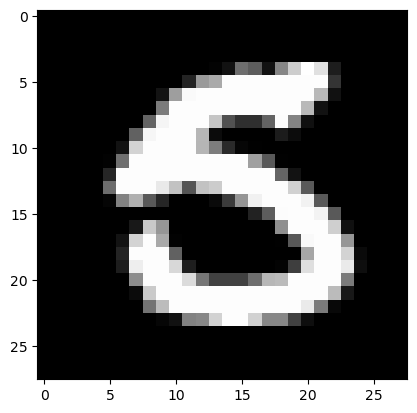

In [23]:
plt.figure()
plt.imshow(x_train[4][:,:,0], cmap="gray")
plt.show()

<a id="5" ></a>
## Create Model

* conv => max pool => dropout => conv => max pool => dropout => fully connected (2 layer)
* Dropout: Dropout, rastgele seçilen nöronların eğitim sırasında göz ardı edildiği bir tekniktir. Dropout, overfitting'i yani ebzerlemeyi önler. 

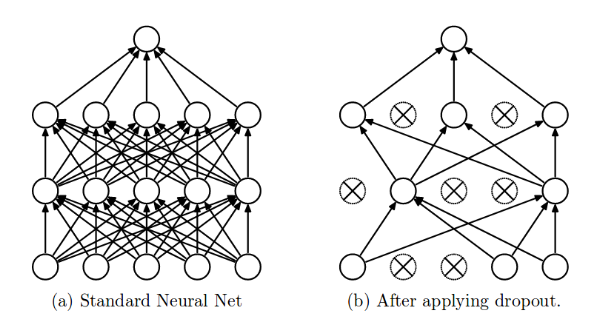

## Convolutional Neural Network
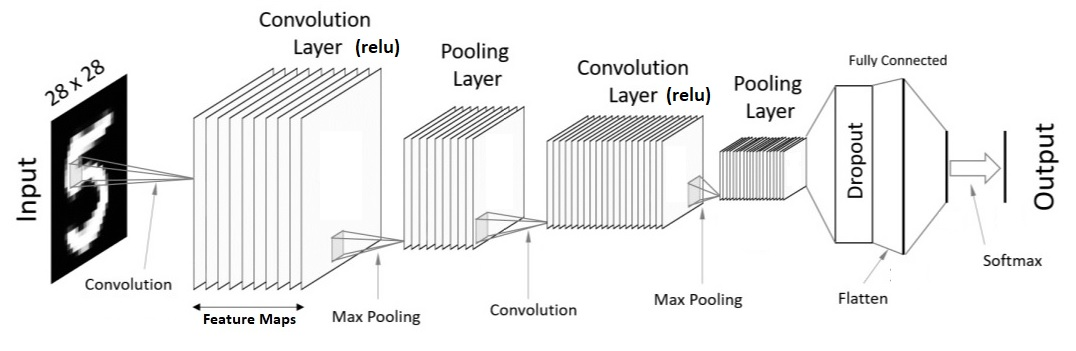

conv => max pool => dropout => conv => max pool => dropout => fully connected (2 layer)

In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(filters=8, # feature detecor
                 kernel_size=(5,5), # feature detecor
                 padding="Same",
                 activation="relu",
                input_shape=(28,28,1))) # resim boyutu(1: gri tonlarında)
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25)) # 4'de 1 kapat

In [26]:
model.add(Conv2D(filters = 16,
                 kernel_size = (3,3),
                 padding = "Same",
                activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2))) # filtreyi gezdirirken atlanan basamak sayısı
model.add(Dropout(0.25))

In [27]:
model.add(Flatten()) # görüntüleri tek boyutlu bir vektöre dönüştürmek için kullanılır.
model.add(Dense(256, activation="relu")) # hidden layer, 256 nöron
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax")) # output layer, 10 sınıflı
# 0'dan 9'a kadar birden fazla sınıf olduğu için softmax kullanılabilir
# softmax'in sonuçları %70 oranında 9, %10 oranında 5... şeklinde bir sonuç dönderir
# softmax, sigmoid'in daha genelleştirilmiş hali
# sigmoid binary classification için kullanılır, softmax multi output classification için kullanabiliriz

Bu kod, bir sinir ağı modelinin katmanlarını oluşturmak için Keras (TensorFlow altında çalışan bir yüksek seviyeli derin öğrenme kütüphanesi) kullanılarak yazılmış gibi görünüyor. Bu kodun bir özetini aşağıda bulabilirsiniz:

1. `model.add(Flatten())`: İlk olarak, bu kod, girdi verilerini düzleştiren (flatten) bir katman ekler. Verilerinizi düzleştirmek, özellikle görüntü verilerini işlerken kullanışlıdır. Örneğin, 2D görüntüleri tek boyutlu bir vektöre dönüştürmek için kullanılır.

2. `model.add(Dense(256, activation="relu"))`: Ardından, 256 nöron içeren bir yoğun (dense) katman eklenir. Bu katman, tam bağlantılıdır, yani her nöron önceki katmandaki her nöronla bağlantılıdır. Aktivasyon fonksiyonu olarak ReLU (Rectified Linear Activation) kullanılır. ReLU, negatif girişleri sıfır yapar ve pozitif girişleri olduğu gibi bırakır.

3. `model.add(Dropout(0.5))`: Dropout, aşırı uydurmayı (overfitting) azaltmaya yardımcı olan bir regülarizasyon tekniğidir. Bu satır, ağın eğitim sırasında rastgele seçilen yarım (0.5) oranındaki nöronları geçici olarak devre dışı bırakır. Bu, ağın genelleme yeteneğini artırabilir.

4. `model.add(Dense(10, activation="softmax"))`: Son katman, 10 sınıfı tanımlayan bir yoğun katmandır. Bu, genellikle çok sınıflı sınıflandırma problemleri için kullanılır. Aktivasyon fonksiyonu olarak softmax kullanılır, bu da her sınıf için bir olasılık dağılımı üretir ve en yüksek olasılığa sahip sınıfı tahmin eder.

Bu kod, bir derin öğrenme modelinin temel yapısını tanımlar. Daha fazla detay için, bu katmanların nasıl bir araya geldiğini ve bu modelin nasıl eğitildiğini gösteren başka kodlar da olmalıdır. Bu kod, özellikle çok sınıflı sınıflandırma problemleri için kullanılabilir.

Bu satır, bir Keras modelinin son katmanını tanımlar. Daha önce de belirtildiği gibi, bu kod, bir yoğun (dense) katman ekler ve bu katmanın çıkışını 10 sınıflı çok sınıflı sınıflandırma problemleri için uygundur. İşte bu satırın ayrıntıları:

- `model.add(Dense(10, activation="softmax"))`: Bu satır, modelin bir yoğun katmanını ekler. Yoğun katman, her nöronun önceki katmandaki her nöronla bağlı olduğu bir tam bağlantılı katmandır.

- `10`: Bu katmanın 10 nörona sahip olduğunu belirtir. Bu, çıkış sınıf sayısını temsil eder. Yani, modelin bu katmanın çıkışında 10 farklı sınıf için olasılıklar üreteceği anlamına gelir.

- `activation="softmax"`: Bu katmanın aktivasyon fonksiyonu olarak softmax'i kullanır. Softmax fonksiyonu, her bir sınıfın olasılığını hesaplayarak çok sınıflı sınıflandırma problemlerinde kullanılır. Çıkışı, 10 sınıfın her biri için bir olasılık dağılımıdır ve bu dağılım, giriş verilerinin hangi sınıfa ait olduğunu tahmin etmek için kullanılır. Softmax fonksiyonu, çıkışların toplamı 1'e eşit olacak şekilde normalleştirir, bu nedenle çıkışlar olasılık olarak yorumlanabilir.

Bu satır, bir modelin çıkış katmanını tanımlar ve modelin sonucunun 10 sınıf arasında bir sınıfa ait olasılıkları içereceğini gösterir. Bu tip bir model, özellikle çok sınıflı sınıflandırma problemlerinde kullanılır, örneğin el yazısı rakam tanıma gibi.

Bu kod satırı, bir Keras modeline bir yoğun (dense) katman ekler. İşte bu satırın ayrıntıları:

- `model.add(Dense(256, activation="relu"))`: Bu satır, modelin bir yoğun katmanını ekler. Yoğun katman, her nöronun önceki katmandaki her nöronla bağlı olduğu bir tam bağlantılı katmandır.

- `256`: Bu katmanın 256 nörona sahip olduğunu belirtir. Bu, katmanın içerdiği nöron sayısını ifade eder ve bu nöronlar giriş verileri ile ilişkilendirilir. Her bir nöron, giriş verilerinin farklı özelliklerini öğrenmeye çalışır.

- `activation="relu"`: Bu katmanın aktivasyon fonksiyonu olarak ReLU (Rectified Linear Activation) kullanır. ReLU, negatif girişleri sıfır yapar ve pozitif girişleri olduğu gibi bırakır. Bu fonksiyon, özellikle derin öğrenme ağlarında yaygın olarak kullanılır çünkü hesaplama açısından hızlıdır ve ağın daha iyi öğrenmesini sağlayabilir.

Bu kod satırı, modelin mimarisine bir yoğun katman ekler ve bu katmanın 256 nöron içerdiği ve ReLU aktivasyon fonksiyonunu kullandığı bir katman olduğunu belirtir. Bu tür bir katman, verilerin daha yüksek seviyeli özelliklerini öğrenmek için kullanılır ve ağın karmaşıklığını artırabilir. Bu, özellikle görsel tanıma veya diğer karmaşık veri işleme görevlerinde kullanışlı olabilir.

In [28]:
# model oluşturuldu, model eğitilecek

## Define Optimizer

Adam optimizasyon algoritması: Bu algoritma, derin öğrenme modelinin ağırlıklarını güncellemek için kullanılan bir optimizasyon algoritmasıdır.

In [29]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
# lr sabitti fakat Adam(adaptive momentum) optimizer'ını kullanırsak learning rate(lr)'i değiştirebiliriz
# beta_1 ve beta_2, lr'in değişimini etkiler
# learning rate'i değiştirerek daha hızlı öğrenmemizi sağlar. 
# learning rate küçükse ve cost'u minimum yapacak parametrelere hızlıca ulaşamazsa lr'i arttırır
# çok hızlı giderse learning rate'i azaltır.

lr=0.001: Bu, öğrenme hızını (learning rate) belirtir. Öğrenme hızı, modelin eğitim sırasında ağırlıklarını güncelleme hızını kontrol eder. Burada, öğrenme hızı 0.001 olarak ayarlanmıştır, yani her güncelleme adımında ağırlıklar biraz değiştirilecektir. Adam optimizasyonu, bu öğrenme hızını otomatik olarak ayarlayabilen bir algoritma olduğu için "adaptive" olarak adlandırılır.

Adam (Adaptive Moment Estimation), gradient tabanlı optimizasyon algoritmalarından biridir ve özellikle derin öğrenme modellerinin eğitiminde yaygın olarak kullanılır. Aşağıdaki temel bileşenlere sahiptir:

1. Öğrenme Hızı (Learning Rate - lr): Adam algoritması, öğrenme hızını otomatik olarak ayarlayabilen bir algoritmadır, bu nedenle lr (öğrenme hızı) parametresini ayarlayabilirsiniz. Öğrenme hızı, ağırlıkların ne kadar hızlı güncelleneceğini belirler. Yüksek bir öğrenme hızı, modelin daha hızlı öğrenmesini sağlar, ancak eğitim sırasında dalgalanmalara neden olabilir. Düşük bir öğrenme hızı, daha istikrarlı ancak daha yavaş bir öğrenme sağlar.

2. Beta 1 ve Beta 2: Adam algoritması, gradientlerin hareketli ortalamalarını hesaplar. Beta 1 ve Beta 2, bu hareketli ortalamaların hesaplanmasında kullanılan faktörlerdir. Genellikle 0.9 ve 0.999 gibi sabit değerler olarak ayarlanır ve bu değerler genellikle iyi sonuçlar verir. Bu faktörler, gradientlerin önceki adımlardaki hareketini kontrol eder ve optimizasyonun düzgün çalışmasına yardımcı olur.

Adam optimizasyonu, gradient tabanlı optimizasyon yöntemlerinin iyileştirilmiş bir sürümüdür çünkü öğrenme hızını otomatik olarak ayarlar ve momentum ile ikinci moment tahminlerini kullanarak gradientleri daha doğru bir şekilde günceller. Bu nedenle, birçok derin öğrenme modelinin eğitiminde tercih edilir.

## Compile Model

categorical crossentropy kullanılacak çünkü categorical crossentropy, binary crossentropy'den farkı binary'de sınıflandırma iki tane, categorical'da ikiden fazladır.

categorical crossentropy: eğer doğru tahmin edildiyse hata sıfır, yanlış tahmin edildiyse hata sıfırdan büyüktür.

loss fonksiyonu hata oranıdır. hata çoksa weight'ler güncellenir, hata minimum noktaya inene kadar. 

In [30]:
# çıkan sonucu accuracy değerine göre değerlendireceğim
model.compile(optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

## Epochs and Batch Size

Diyelim ki 10 örnekten (veya gözlem birimi) oluşan bir veri kümeniz var. Bir grup boyutunuz (batch size) 2 ve algoritmanın 3 epok boyunca çalışmasını istediğinizi belirlediniz. Bu nedenle her epokta 5 grup olacak şekilde (10/2 = 5) bölüneceksiniz. Her bir grup, algoritmanın içinden geçirilir, bu nedenle her epokta 5 tekrarlamaya sahip olacaksınız.

- İlk olarak, veri kümenizi 2'şerli gruplara ayırırsınız. Bu nedenle, ilk grup 1. ve 2. örnekleri içerir, ikinci grup 3. ve 4. örnekleri içerir ve böyle devam eder.
- İlk epokta, bu 5 grup sırayla algoritmanın içinden geçirilir. Her grup, modelinizi eğitmek veya güncellemek için kullanılır.
- İkinci epokta, aynı 5 grup tekrar sırayla algoritmanın içinden geçirilir.
- Üçüncü ve son epokta da aynı işlem tekrarlanır.
- Sonuç olarak, her epokta toplam 5 tekrarlama veya iterasyon gerçekleşir.

Bu süreç, modelinizi veri kümenizin farklı bölümleri üzerinde tekrar tekrar eğiterek, modelinizi daha iyi hale getirmenize yardımcı olur.

In [31]:
epochs = 10 # epochs küçükse daha az zaman harcarız
batch_size = 250 

## Data Augmentation

overfitting'i önlemek için farklı boyuttaki, farklı tarzdaki, farklı rotasyondaki, farklı veri setlerini, veri setine eklememiz lazım

training veri setinde küçük değişiklikler yapıyoruz. bu değişikler sayesinde gerçek resimimize benzeyen resimler yeniden üretiyoruz

In [32]:
datagen = ImageDataGenerator(
    featurewise_center = False, # Veri kümesinin özelliklerini merkezileştirir (ortalama değeri 0 olacak şekilde).
    samplewise_center = False, # her bir örneğin ortalamasını 0'a ayarla
    featurewise_std_normalization = False, # Veri kümesinin özelliklerini standartlaştırır (standart sapması 1 olacak şekilde).
    samplewise_std_normalization = False, # Her bir veri örneğinin özelliklerini standartlaştırır (standart sapması 1 olacak şekilde).
    zca_whitening =False, #
    rotation_range =0.5,
    zoom_range=0.5,
    # enlem ve boylamda, genişlik ve uzunlukta %5 shift ediyoruz
    width_shift_range=0.5, # sağa kaydırma, sola kaydırm
    height_shift_range =0.5,
    # yatay ve random bir şekide çevirme(flip)
    horizontal_flip=False,
    vertical_flip=False
)

Bu kod, veri artırma (data augmentation) işlemi için Keras'ın `ImageDataGenerator` sınıfını kullanır. Veri artırma, genellikle eğitim verilerinin çeşitliliğini artırmak ve aşırı uyum (overfitting) sorunlarını azaltmak için kullanılır. Veri artırma, mevcut eğitim verilerini değiştirerek yeni veriler oluşturmayı amaçlar.

Kodunuzda kullanılan parametrelerin açıklamaları şu şekildedir:

- `featurewise_center`: Veri kümesinin özelliklerini merkezileştirir (ortalama değeri 0 olacak şekilde).
- `samplewise_center`: Her bir veri örneğinin özelliklerini merkezileştirir (ortalama değeri 0 olacak şekilde).
- `featurewise_std_normalization`: Veri kümesinin özelliklerini standartlaştırır (standart sapması 1 olacak şekilde).
- `samplewise_std_normalization`: Her bir veri örneğinin özelliklerini standartlaştırır (standart sapması 1 olacak şekilde).
- `zca_whitening`: ZCA beyazlatma işlemini uygular.
- `rotation_range`: Rastgele olarak görüntüleri döndürür (0.5 dereceye kadar rastgele dönüş).
- `zoom_range`: Rastgele olarak görüntüleri yakınlaştırır veya uzaklaştırır (0.5 faktörüne kadar).
- `width_shift_range`: Görüntüleri yatayda kaydırır (0.5 oranında).
- `height_shift_range`: Görüntüleri dikeyde kaydırır (0.5 oranında).
- `horizontal_flip`: Görüntüleri yatayda çevirme (açma ve kapatma) işlemi yapmaz.
- `vertical_flip`: Görüntüleri dikeyde çevirme (açma ve kapatma) işlemi yapmaz.

Bu parametreler, veri artırma işlemi sırasında hangi tür dönüşümlerin uygulanacağını ve ne kadar rastgelelikle yapılacağını belirler. Veri artırma, modelin daha genelleştirilmiş ve daha iyi performans gösteren bir şekilde eğitilmesine yardımcı olabilir.

In [33]:
datagen.fit(x_train)

## Fit the Model

In [34]:
# model eğitimi

In [35]:
history = model.fit_generator(
    datagen.flow(x_train, y_train, batch_size=batch_size), # veri artırma (data augmentation)
    epochs=epochs,
    validation_data=(x_val, y_val),
    steps_per_epoch = x_train.shape[0] // batch_size
)

Epoch 1/10
151/151 [==============================] - 4s 22ms/step - loss: 2.1414 - accuracy: 0.2085 - val_loss: 1.5916 - val_accuracy: 0.5212
Epoch 2/10
151/151 [==============================] - 3s 23ms/step - loss: 1.8554 - accuracy: 0.3403 - val_loss: 1.0243 - val_accuracy: 0.7619
Epoch 3/10
151/151 [==============================] - 3s 23ms/step - loss: 1.6886 - accuracy: 0.4118 - val_loss: 0.7253 - val_accuracy: 0.8255
Epoch 4/10
151/151 [==============================] - 3s 22ms/step - loss: 1.5826 - accuracy: 0.4513 - val_loss: 0.5861 - val_accuracy: 0.8471
Epoch 5/10
151/151 [==============================] - 3s 22ms/step - loss: 1.5072 - accuracy: 0.4822 - val_loss: 0.4811 - val_accuracy: 0.8850
Epoch 6/10
151/151 [==============================] - 3s 23ms/step - loss: 1.4601 - accuracy: 0.4978 - val_loss: 0.4512 - val_accuracy: 0.8764
Epoch 7/10
151/151 [==============================] - 3s 23ms/step - loss: 1.4134 - accuracy: 0.5173 - val_loss: 0.3896 - val_accuracy: 0.9007

Bu kod parçası, bir Keras modelini eğitirken veri artırma işlemi yapmak için `ImageDataGenerator` kullanarak `fit_generator` fonksiyonunu kullanır. İşte bu kodun açıklaması:

- `model.fit_generator`: Bu işlev, modelinizi eğitirken veri artırma işlemini kullanmanıza olanak tanır.

- `datagen.flow(x_train, y_train, batch_size=batch_size)`: `ImageDataGenerator` tarafından dönüştürülen verileri kullanarak bir veri akışı (data generator) oluşturur. Bu veri akışı, verilerin artırılmış hallerini üretir ve eğitim süreci boyunca bu artırılmış verileri kullanır.

- `epochs`: Eğitim döngüsünün kaç kez tamamlanacağını belirler. Her bir epoch, eğitim verilerinin tamamının model tarafından işlendiği bir iterasyonu temsil eder.

- `validation_data=(x_val, y_val)`: Eğitim sırasında modelin performansını değerlendirmek için kullanılan doğrulama veri kümesini belirtir. `x_val` doğrulama veri örneklerini ve `y_val` doğrulama etiketlerini içerir.

- `steps_per_epoch = x_train.shape[0] // batch_size`: Her bir eğitim epoch'u sırasında kaç adımın tamamlanacağını belirtir. Burada, toplam eğitim verisi sayısı (`x_train.shape[0]`) ile batch boyutu (`batch_size`) bölünerek hesaplanır. Her bir adımda, bir batch (mini-batch) veri model tarafından işlenir.

Bu kod, modelinizi eğitirken veri artırma işlemini kullanarak daha fazla çeşitlilik eklemek ve modelin aşırı uymayı (overfitting) azaltmak için yaygın bir yaklaşımı temsil eder. Veri artırma, eğitim verilerinin her epoch'ta rastgele dönüşümlere tabi tutularak modelin daha genelleştirilmiş özellikler öğrenmesine yardımcı olabilir.

* epoch değerini artırarak
* data augmentation kısmındaki parametrelerle oynayarak
* batch_size
* Dense yani layer ekleyerek
* filtre sayısını ve kernel boyutunu değiştirerek

*accuracy'yi arttırabilirsiniz*

## Evaluate the Model

modeli değerlendirelim

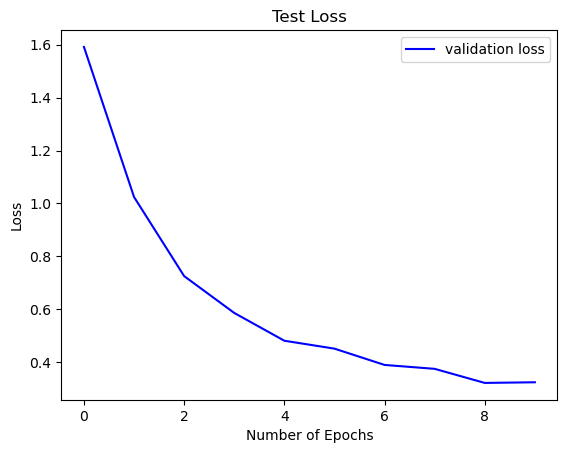

In [37]:
plt.plot(history.history["val_loss"], color="b", label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

epochs sayısı arttıkça val_loss biraz daha azalacaktır. (validation_data=(x_val, y_val))

132/132 [==============================] - 0s 2ms/step


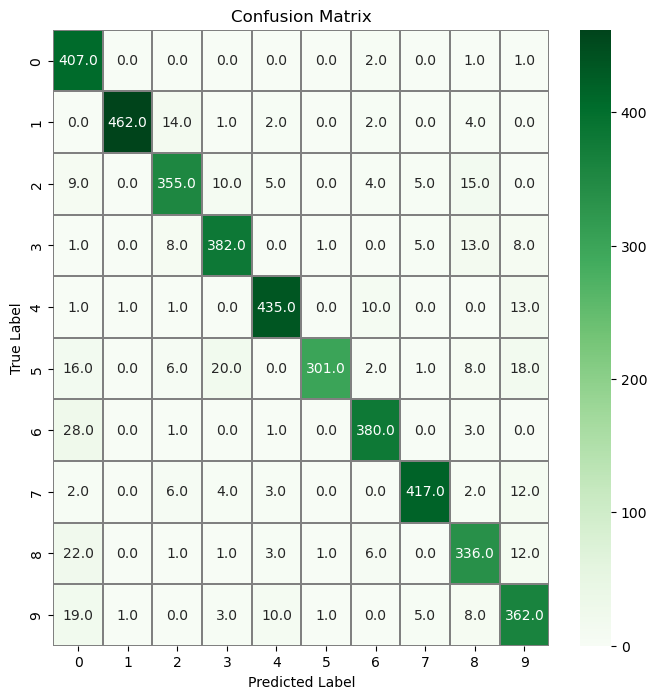

In [38]:
# confusion matrix
y_pred = model.predict(x_val) # Her bir örnek için, modelin her sınıf için tahmin ettiği olasılık dağılımını içerir.
y_pred_classes = np.argmax(y_pred, axis=1) # her bir örnek için en yüksek olasılığa sahip sınıf etiketini seçer. 

y_true = np.argmax(y_val, axis=1)

confusion_mtx = confusion_matrix(y_true, y_pred_classes)

f, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(confusion_mtx,
            annot=True,
            linewidths=0.01,
            cmap="Greens",
            linecolor="gray",
            fmt=".1f",
            ax=ax)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Bu kod parçası, bir modelin sınıflandırma performansını değerlendirmek için bir karmaşıklık matrisi (confusion matrix) görselleştirmek için kullanılır. Karmaşıklık matrisi, modelin doğru ve yanlış sınıflandırdığı sınıfları ve bu sınıflamaların sayılarını gösteren bir matristir.

İşte bu kodun açıklamaları:

- `y_pred = model.predict(x_val)`: Model, doğrulama veri kümesi (`x_val`) üzerinde tahminler yapar ve bu tahminleri `y_pred` değişkenine kaydeder.

- `y_pred_classes = np.argmax(y_pred, axis=1)`: Tahmin edilen sınıf etiketlerini, modelin çıktılarından çıkarır. `np.argmax` işlevi, her örneğin en yüksek olasılığa sahip sınıfını seçer.

- `y_true = np.argmax(y_val, axis=1)`: Gerçek sınıf etiketlerini, doğrulama veri kümesi için gerçek etiketlerden (`y_val`) çıkarır.

- `confusion_mtx = confusion_matrix(y_true, y_pred_classes)`: Gerçek sınıf etiketleri ile tahmin edilen sınıf etiketleri arasındaki karmaşıklık matrisini hesaplar. `confusion_matrix` işlevi, doğru sınıflandırmaları ve yanlış sınıflandırmaları sayar.

- `f, ax = plt.subplots(figsize=(8, 8))`: Bir matplotlib figürü ve eksen objesi oluşturur, bu figürün boyutunu belirtir.

- `sns.heatmap(...)`: Karmaşıklık matrisini ısı haritası olarak görselleştirir. `annot=True`, hücrelerin içine sayısal değerleri eklemeyi sağlar. `cmap="Greens"` ile yeşil tonlarını kullanarak görsel daha okunabilir hale getirilir.

- `plt.xlabel`, `plt.ylabel`, ve `plt.title` ile eksen etiketleri ve başlık eklenir.

- `plt.show()`: Sonuçları görüntüler.

Bu kod, modelin doğrulama verileri üzerinde hangi sınıfları doğru veya yanlış sınıflandırdığını görselleştiren bir karmaşıklık matrisi oluşturur. Bu matris, modelin performansını değerlendirmeye ve hatalı sınıflandırmaları belirlemeye yardımcı olabilir.

Bu kod, modelin tahminlerini kullanarak her bir örnek için en olası sınıf etiketini belirlemek için kullanılır. İşte bu kodun açıklamaları:

- `y_pred`: Bu değişken, modelin tahminlerini içerir. Genellikle bir nesne dizisi veya bir dizi olarak gelir. Her bir örnek için, modelin her sınıf için tahmin ettiği olasılık dağılımını içerir.

- `np.argmax(y_pred, axis=1)`: Bu kod, her bir örnek için en yüksek olasılığa sahip sınıf etiketini seçer. `np.argmax` işlevi, verilen bir dizideki en büyük değerin indeksini döndürür. `axis=1` parametresi, her bir örnek için en yüksek olasılığa sahip sınıfın indeksini belirlemek için her bir örnek üzerinde işlem yapılacağını belirtir.

Sonuç olarak, `y_pred` dizisi içindeki her bir örnek için en olası sınıf etiketini içeren `y_pred_classes` adında bir dizi oluşturulur. Bu, modelin her bir örnek için tahmin ettiği sınıfı temsil eder. Bu tahminler daha sonra karmaşıklık matrisi gibi değerlendirme metriklerini hesaplamak veya modelin performansını değerlendirmek için kullanılabilir.

* gerçek değeri 0, tahim edilen değer 0 : 407 tane doğru tahmin etmiş
* gerçek değer 9, tahmin edilen değer 9 : 362 tane doğru tahmin etmiş
* gerçek değeri 6, tahmin edilen değer 0 : 28 tane yanlış tahmiş etmiş